<a href="https://colab.research.google.com/github/hargettc2015/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Unit_2_Sprint_1_Module_2_Reg_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.tail()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49351,1.0,2,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,40.8699,-73.9172,2200,30 Park Terrace East,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import datetime
from datetime import date
from datetime import time
from datetime import datetime

In [0]:
df['created'] = pd.to_datetime(df['created']).dt.month

In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,6,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,6,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,4,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,4,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.tail()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
49347,1.0,2,2016,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49351,1.0,2,2016,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,40.8699,-73.9172,2200,30 Park Terrace East,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train = df[df['created'] < 6]
test = df[df['created'] >= 6]

In [0]:
train.shape

(31844, 34)

In [0]:
test.shape

(16973, 34)

In [0]:
#Average price to rent in the months of January to may.
train['price'].mean()

3575.604007034292

In [0]:
#Average price to rent in the months of June to December. 
test['price'].mean()

3587.0546750721733

In [0]:
#How far off would I be if I guessed this every year?
target = 'price'
y_train = train[target]
y_test = test[target]

In [0]:
#Mean baseline using zero features
guess = y_train.mean()
print(guess)

3575.604007034292


In [0]:
#Train error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (1-5 rent by month): {mae:.2f} percentage points')


Train Error (1-5 rent by month): 1201.88 percentage points


In [0]:
#Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error(6-12 rent by month): {mae:.2f} percentage points')

Test Error(6-12 rent by month): 1197.71 percentage points


In [0]:
#Simple Regression 1 feature:
import pandas as pd
import plotly.express as px

px.scatter(
    train, 
    x='latitude',
    y='price',
    text= 'created',
    title= 'Rent Prices by latitude between January and May',
    trendline='ols' #ordinary least squares
)

In [0]:
#Five step process:
#Step 1: Import appropriate estimator class from scikit-learn
from sklearn.linear_model import LinearRegression


In [0]:
#Step 2: Instantiate this class
model = LinearRegression()

In [0]:
#Step 3: Arrange X features matrices(already did y target vectors)
features = ['latitude']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on:{features}')

Linear Regression, dependent on:['latitude']


In [0]:
#Step 4 fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 1198.87 percentage points


In [0]:
#Step 5 Apply the model to the new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} percentage points')

Test Error: 1195.62 percentage points


In [0]:
y_pred

array([3640.24845711, 3497.20213615, 3407.84277605, ..., 3546.7867711 ,
       3495.41851619, 3590.12873618])

In [0]:
y_test

0        3000
1        5465
11       1675
14       3050
24       7400
         ... 
49305    2295
49310    3995
49320    2727
49332    4850
49347    3200
Name: price, Length: 16973, dtype: int64

In [0]:
y_test - y_pred

0        -640.248457
1        1967.797864
11      -1732.842776
14       -511.947541
24       3803.628594
            ...     
49305   -1111.415880
49310     474.610804
49320    -819.786771
49332    1354.581484
49347    -390.128736
Name: price, Length: 16973, dtype: float64

In [0]:
(y_test - y_pred).abs().mean()

1195.6199393006254

In [0]:
#Less than the baseline mean of 3575.604007034292

In [0]:
#multiple regression-2 features. Latutude and Longitude because I wanted to see what they would look like in 3d :)
px.scatter_3d(
    train, 
    x= 'latitude',
    y= 'longitude',
    z= 'price',
    text = 'created',
    title = "Rent by Latitude and Longitude from January to May."
)

In [0]:
#Rearrange X features matricies
features = ['latitude', 'longitude']
print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]


Linear Regression, dependent on: ['latitude', 'longitude']


In [0]:
#Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 1147.15 percentage points


In [0]:
#Apply the model to the new data
y_pred = model.predict(X_test)
mea = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} percentage points')

Test Error: 1147.15 percentage points


In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):

  #plot data
  fig = px.scatter_3d(df, x, y, z, **kwargs)

  #fit Linear Regression
  features = [x, y]
  target = z
  model = LinearRegression()
  model.fit(df[features], df[target])

  #Define grid of coordinates in the feature space
  xmin, xmax = df[x].min(), df[x].max()
  ymin, ymax = df[y].min(), df[y].max()
  xcoords = np.linspace(xmin, xmax, num)
  ycoords = np.linspace(ymin, ymax, num)
  coords = list(itertools.product(xcoords, ycoords))

  #Make predictions for the grid
  predictions = model.predict(coords)
  Z = predictions.reshape(num, num).T

  #Plot predictions as a 3D surface (plane)
  fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))

  return fig

In [0]:
regression_3d(
    train, 
    x='latitude',
    y='longitude',
    z='price',
    text= 'created',
    title = 'Average Rent based on latitude and longitude from January to May'
)

In [0]:
#intercept and coeficients
model.intercept_, model.coef_

(-1285931.9851655478, array([  2208.18971896, -16215.70541389]))

In [0]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y= {beta0} + {beta1}x1 + {beta2}x2')

y= -1285931.9851655478 + 2208.1897189587876x1 + -16215.705413894815x2


In [0]:
#This is the easier to read version
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -1285931.9851655478
latitude      2208.189719
longitude   -16215.705414


In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Guess and check practice...
def squared_errors(df, feature, target, m, b):
  #plot data
  fig = plt.figure(figsize=(7,7))
  ax = plt.axes()
  df.plot.scatter(feature,target, ax=ax)

  #make predictions
  x = df[feature]
  y = df[target]
  y_pred = m*x + b
  
  #plot predictions
  ax.plot(x, y_pred)

  #plot squared errors
  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()
  scale = (xmax-xmin)/(ymax-ymin)
  for x, y1, y2, in zip(x, y, y_pred):
    bottom_left = (x, min(y1, y2))
    height = abs(y1 - y2)
    width = height * scale
    ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))

  #Print regression metrics
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error', rmse)
  print('Mean Absolute Error', mae)
  print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error 1762.1090255404863
Mean Absolute Error 1201.8811133682555
R^2: 0.0


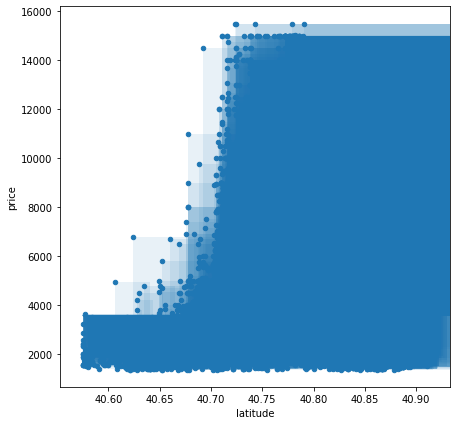

In [0]:
#Heres my mean baseline
feature = 'latitude'
squared_errors(train, feature, target, m=0, b=y_train.mean())

Mean Squared Error: 14715090.355091736
Root Mean Squared Error 3836.025332957505
Mean Absolute Error 3407.3517768370807
R^2: -3.739116466092984


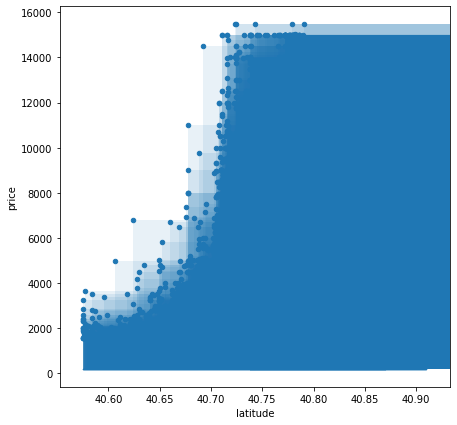

In [0]:
   squared_errors(train, feature, target, m=3, b=46)

Mean Squared Error: 14796243.438951459
Root Mean Squared Error 3846.5885455753464
Mean Absolute Error
R^2: -3.760663510251553


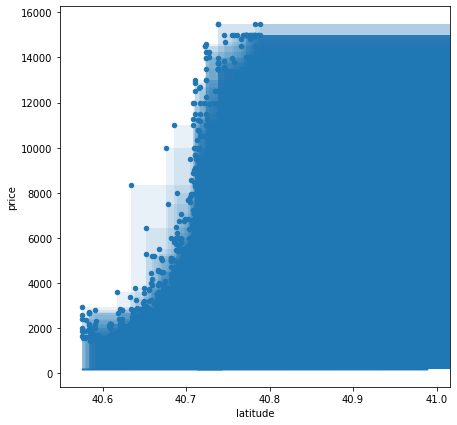

In [0]:
squared_errors(test, feature, target, m=3, b=46)

In [0]:
#Calculating the B with numpy
def add_constant(X):
  constant = np.ones(shape=(len(X),1))
  return np.hstack((constant, X))
X = add_constant(train[features].values)
print('X')
print(X)

# y is a column vector
y = train[target].values[:, np.newaxis]
print('y')
print(y)

#Least squares solution in code..
X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta_hat = X_transpose_X_inverse @ X_transpose_y

print('Bata Hat')
print(beta_hat)


X
[[  1.      40.7388 -74.0018]
 [  1.      40.7539 -73.9677]
 [  1.      40.8241 -73.9493]
 ...
 [  1.      40.7601 -73.99  ]
 [  1.      40.7066 -74.0101]
 [  1.      40.8699 -73.9172]]
y
[[2850]
 [3275]
 [3350]
 ...
 [2595]
 [3350]
 [2200]]
Bata Hat
[[-1285931.97902298]
 [    2208.1896937 ]
 [  -16215.7053448 ]]


In [0]:
model.intercept_, model.coef_


(-1285931.9851655478, array([  2208.18971896, -16215.70541389]))